### INTRODUCTION 

In [113]:
#TRAVAIL A REALISER :
# 1. rapprocher deux exports :
#un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock
#et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne
#(nom, description, nombre de ventes...).
#2. une fois le rapprochement effectué:
#avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.
#3. Vérifier les erreurs de saisie dans certains prix des produits
#puis effectuer une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes
#puis les lister et en faire une représentation graphique pour plus de lisibilité.

In [114]:
#POINTS DE PRECISIONS
#FICHIER ERP= références produit+leur prix de vente+leur état de stock
#FICHIER WEB(OUTIL DE CMS)= informations des produits commercialisés en ligne (nom, description, nombre de ventes...)
#le fichier web contient le nb de ventes pour chaque produit mais permet pas d’analyser l'évo des ventes dans le temps
#FICHIER LIAISON= permet de faire le lien entre le fichier ERP et le fichier WEB 
#permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU).
#FICHIER LIAISON= erreur nom de la colonne.la colonne id_web correspond au SKU des produits dans la boutique en ligne.
#certains product_id du fichier n'ont pas été rapproché au ref du fichier web

In [115]:
#import des librairies
import pandas as pd
import numpy as np
import seaborn as sns

### PREMIERE PARTIE : NETTOYAGE DES DONNEES <a class="anchor" id="PREMIERE_PARTIE_:_NETTOYAGE_DES_DONNEES"></a>

####  FICHIER ERP <a class="anchor" id="FICHIER_ERP"></a>

In [116]:
#chargement du fichier ERP
#le fichier ERP contient les références produit et leur prix de vente 
df_erp=pd.read_csv('ERP.csv')
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [117]:
# A noter ici que le "product_id" concerne la reference du produit qui est équivalente au sku dans le fichier web

In [118]:
#vérifier le type des données
df_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [119]:
#verifier la présence de valeurs nulles
print(df_erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [120]:
#vérifier le nombre de doublons
df_erp['product_id'].duplicated().sum()

0

In [121]:
#vérifier la taille
df_erp.shape

(825, 5)

In [122]:
#EN SYNTHESE:
#Type des données est correct
#Pas de valeurs manquantes
#Pas de doublons

#### FICHIER WEB

In [123]:
#chargement du fichier web
#le fichier web repertorie les vents réalisées en ligne
df_web=pd.read_csv('WEB.csv')
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [124]:
# a noter: le SKU correspond au numéro de référence unique du produit

In [125]:
#vérifier le type des données
#ici anomalie détectée sur le type du sku exprimé en objet au lieu de int
df_web.dtypes

sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

In [126]:
#on constate que le sku est exprimé en objet au lieu de Int
#afficher les données présentes dans la colonne sku pour déterminer quelles sont les valeurs qui posent problème
df_web['sku'].unique()

array(['bon-cadeau-25-euros', '15298', '15296', '15300', '19814', '19815',
       '15303', '14975', '16042', '14980', '16041', '15269', '14977',
       '16044', '16043', '16449', '16045', '16030', '13127', '19816',
       '16029', '16039', '16318', '16275', '16498', '16320', '16319',
       '15966', '15022', '15967', '15490', '16416', '11862', '15444',
       '15953', '12045', '13074', '15941', '16069', '13072', '15440',
       '13435', '13078', '13117', '16296', '16014', '16462', '16013',
       '16180', '15676', '16120', '15564', '15675', '15378', '15813',
       '13416', '14905', '15767', '16505', '15683', '16504', '15787',
       '14800', '15353', '15382', '15339', '11668', '13209', '15341',
       '13217', '304', '11641', '1662', '1360', '15648', '1364', '7086',
       '1366', '15140', '16238', '16237', '15141', '14944', '14941',
       '14751', '16093', '15668', '15373', '15375', '14474', '15482',
       '13453', '15075', '16124', '15785', '15784', '15786', '14332',
       '16210

In [127]:
#ANOMALIES:
#on comprend que le sku est exprimé en objet car:
# les données "13127-1" "bon-cadeau-25-euros" ne sont pas exprimées dans le bon format
# On remarque également la présence de valeurs manquantes : "nan"

In [128]:
#verifier la présence de valeurs nulles
print(df_web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


In [129]:
# 85 sku sont manquant

In [130]:
#afficher la colonne sku (voir comment il detecte les NaN)
print(df_web['sku'])

0       bon-cadeau-25-euros
1                     15298
2                     15296
3                     15300
4                     19814
               ...         
1508                  16135
1509                  15891
1510                  15887
1511                13127-1
1512                  16230
Name: sku, Length: 1513, dtype: object


In [131]:
#afficher les valeurs nulles
print(df_web['sku'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
1508    False
1509    False
1510    False
1511    False
1512    False
Name: sku, Length: 1513, dtype: bool


In [132]:
# on constate qu'il considère bien les valeurs nulles comme des valeurs manquantes , 
#"bon cadeau" et "13127-7" ne sont pas considérées comme des valeurs nulles malgré le format

In [133]:
#pour afficher + de lignes
pd.set_option('display.max_rows', 100)

In [134]:
#filtrer le fichier sur les sku nuls pour avoir le détail des lignes pour lesquelles le sku est nul
df_web[df_web['sku'].isna()] 

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
#suppression des lignes pour lesquelles le sku est manquant
#on supprime toutes les lignes pour lesquelles le sku est manquant 
#car nous ne pouvons pas deviner quel produit a été vendu 
df_web.dropna(subset=['sku'], inplace=True)

In [136]:
# on reverifie la présence de valeurs manquantes
print(df_web.isnull().sum())

sku                         0
virtual                     0
downloadable                0
rating_count                0
average_rating              0
total_sales                 0
tax_status                714
tax_class                1428
post_author                 0
post_date                   0
post_date_gmt               0
post_content             1428
post_title                  0
post_excerpt              714
post_status                 0
comment_status              0
ping_status                 0
post_password            1428
post_name                   0
post_modified               0
post_modified_gmt           0
post_content_filtered    1428
post_parent                 0
guid                        0
menu_order                  0
post_type                   0
post_mime_type            714
comment_count               0
dtype: int64


In [137]:
#vérifier la présence de doublons
df_web['sku'].duplicated().sum()

714

In [138]:
#Calculer le nombre de vrai doublon
df_web[df_web['sku'].duplicated()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [139]:
#moyenne des doublons
df_web['sku'].duplicated().mean()

0.5

In [140]:
#lister les doublons
df_web.duplicated().head()
df_web[df_web.duplicated()].head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [141]:
#Afficher les doublons sur le sku
df_web[df_web.duplicated('sku')] 

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [142]:
#On filtre sur l'une des lignes pour vérifier s'il s'agit bel et bien d'un vrai doublon
# ici on filtre sur le sku 16230
df_web[df_web['sku']=='16230']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
798,16230,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-07-20 11:00:00,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1512,16230,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-07-20 11:00:00,...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,2020-08-13 08:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [143]:
#filtrer sur les post_type product
df_web_product_only=df_web[df_web['post_type']=='product']
df_web_product_only.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [144]:
#vérifier le nombre de ligne
#de ce nouveau dataset
df_web_product_only.shape

(714, 28)

#### FICHIER LIAISON 

In [145]:
#chargement du fichier liaison
df_liaison=pd.read_csv('LIAISON.csv')
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [146]:
##vérifier le type des données
df_liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [147]:
#on constate que l'id_web est exprimé en objetc au lieu de Int

In [148]:
#verifions l'origine du KO sur le type
df_liaison['id_web'].unique()

array(['15298', '15296', '15300', '19814', '19815', '15303', '14975',
       '16042', '14980', '16041', '15269', '14977', '16044', '16043',
       '16449', '16045', '16030', '13127', '19816', nan, '16029', '16039',
       '16318', '16275', '16498', '16320', '16319', '15966', '15022',
       '15967', '15490', '16416', '11862', '15444', '15953', '12045',
       '13074', '15941', '16069', '13072', '15440', '13435', '13078',
       '13117', '16296', '16014', '16462', '16013', '16180', '15676',
       '16120', '15564', '15675', '15378', '15813', '13416', '14905',
       '15767', '16505', '15683', '16504', '15787', '14800', '15353',
       '15382', '15339', '11668', '13209', '15341', '13217', '304',
       '11641', '1662', '1360', '15648', '1364', '7086', '1366', '15140',
       '16238', '16237', '15141', '14944', '14941', '14751', '16093',
       '15668', '15373', '15375', '14474', '15482', '13453', '15075',
       '16124', '15785', '15784', '15786', '14332', '16210', '16211',
       '16209

In [149]:
#on remarque ici que les anomalies sur le format ont été reproduites ici 
# 'bon-cadeau-25-euros et 13127-1'

In [150]:
#renommer la colonne id_web en sku pour faciliter l'analyse
df_liaison.rename(columns={'id_web': 'sku'}, inplace=True)
df_liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [151]:
#verifier la présence de valeurs nulles
print(df_liaison.isnull().sum())

product_id     0
sku           91
dtype: int64


In [152]:
#filtrer le fichier sur les sku nuls pour avoir le détail des lignes pour lesquelles le sku est nul
df_liaison[df_liaison['sku'].isna()] 

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
184,4278,NaN
185,4279,NaN
234,4565,NaN
238,4577,NaN


In [153]:
#suppression des lignes pour lesquelles le sku est manquant
#on supprime toutes les lignes pour lesquelles le sku est manquant car nous ne pouvons pas deviner quel produit a été vendu 
df_liaison.dropna(subset=['sku'], inplace=True)

In [154]:
#verifier à nouveau la présence de valeurs nulles
print(df_liaison.isnull().sum())

product_id    0
sku           0
dtype: int64


In [155]:
#vérifier la présence de doublons
df_liaison.duplicated().sum()

0

In [156]:
#vérifier la taille 
df_liaison.shape

(734, 2)

### DEUXIEME PARTIE : ANALYSE DES DONNEES 

#### RAPPROCHER LES FICHIERS ERP ET WEB 


In [198]:
#commencer par rapprocher le fichier liaison avec le fichier ERP
df_li_erp=pd.merge(df_liaison,df_erp, how= 'inner', on='product_id')
df_li_erp.head()


,product_id,sku,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


In [199]:
#vérifier la taille du fichier
df_li_erp.shape

(734, 6)

In [200]:
#puis rapprocher le tout avec le fichier web
df_erp_web=pd.merge(df_li_erp,df_web_product_only, how='inner', on='sku')
df_erp_web.head()

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814,1,14.1,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815,1,46.0,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [201]:
#vérifier la taille
df_erp_web.shape

(714, 33)

In [202]:
#on constate la perte de 111 lignes après jointure
#cherchons l'origine

In [203]:
# on réalise une jointure externe cette fois ci, entre le fichier liaison et le fichier erp
df1 = pd.merge(df_erp, df_liaison, on = "product_id", how = 'outer', indicator = True)
print('format du fichier erp:', df_erp.shape)
print('format du fichier liaison:', df_liaison.shape)
print('format du fichier df1:', df1.shape)
print('')
df1.head()

format du fichier erp: (825, 5)
format du fichier liaison: (734, 2)
format du fichier df1: (825, 7)



,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [204]:
#après jointure on vérifie quelles sont les lignes qui n'ont pas trouvées de correspondances
df_jointure= df1[df1['_merge']!= 'both']
print(df_jointure.shape)
df_jointure

(91, 7)


,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
19,4055,0,86.1,0,outofstock,NaN,left_only
49,4090,0,73.0,0,outofstock,NaN,left_only
50,4092,0,47.0,0,outofstock,NaN,left_only
119,4195,0,14.1,0,outofstock,NaN,left_only
131,4209,0,73.5,0,outofstock,NaN,left_only
151,4233,0,20.0,0,outofstock,NaN,left_only
184,4278,0,21.5,0,outofstock,NaN,left_only
185,4279,0,10.8,0,outofstock,NaN,left_only
234,4565,0,30.5,3,instock,NaN,left_only
238,4577,0,49.0,1,instock,NaN,left_only


In [182]:
# nous avons ici 91 lignes qui n'ont pas both
#on remarque qu'il s'agit de toutes les lignes pour lesquelles le sku est nul

In [183]:
#on vérifie si les liaisons entre les 2 fichiers sont toutes du type 'left_only'
#en affichant les lignes differentes de 'left_only'
df_left_only = df_jointure[df_jointure['_merge']!='left_only']
print(df_left_only.shape)
df_left_only


(0, 7)


,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge


In [184]:
#Il n’y a aucune ligne différentes de 'left_only’ , elles sont alors toutes de type 'left_only.
#On constate que lors de cette jointure que les product_id sont non nul mais que les sku sont nul.
#Il n’y a donc pas eu de correspondance sur 91 lignes car pas de sku référencé correspondant.

In [185]:
#on supprime la colonne merge 
df1= df1.drop(['_merge'], axis=1)

In [186]:
#ensuite faisons la jointure en notre nouveau dataset et le fichier web
df2=pd.merge(df1,df_web_product_only, on='sku', how='outer', indicator=True)
print('format du fichier df1:', df1.shape)
print('format du fichier df_web_product_only:', df_web_product_only.shape)
print('format du fichier df2:', df2.shape)
print('')
df2.head()

format du fichier df1: (825, 6)
format du fichier df_web_product_only: (714, 28)
format du fichier df2: (825, 34)



,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [187]:
#afficher les lignes qui n'ont pas trouvées correspondances
df_jointure2= df2[df2['_merge']!='both']
print(df_jointure2.shape)
df_jointure2

(111, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [188]:
#nous avons 111 lignes qui n’ont pas trouvées correspondances il s’agit des 91 données qui n’ont pas matchés
#lors de la 1ere jointure + les 20 autres qui n’ont pas matchées lors de la seconde jointure


In [189]:
#on verifie si les liaisons sont toutes du type left_only en affichant les lignes qui ne sont pas des left only
df_not_left=df_jointure2[df_jointure2['_merge']!='left_only']
print(df_not_left.shape)
df_not_left

(0, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


In [190]:
#il y a 0 lignes differentes de 'left_only' elles sont alors toutes du type 'left_only'
#pour rappel a gauche de la liaison nous avons le fichier qui correspond à la jointure entre liaison et erp
#à droite nous avons la jointure avec le fichier web filtré sur les produits
#on peut donc en déduire que les sku présents dans la table liaison n'ont pas trouvé de correspondance
#dans le fichier web filtré

In [191]:
#observation du fichier df_jointure2 c'est a dire le df final avec merge both
#pour les valeurs n'ayant pas trouvées de correspondance on observe les valeurs du sku not null
obs=df_jointure2[df_jointure2['sku'].notnull()]
print(obs.shape)
obs

## on observe que dans ces parfois lignes l'id web est non null et le sku est nul 

(20, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
276,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
318,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
321,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
425,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
459,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
462,4869,0,17.2,0,outofstock,14360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
490,4921,0,13.8,0,outofstock,15608,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
491,4922,0,21.5,0,outofstock,15586,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
534,5018,0,15.4,0,outofstock,15272,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
536,5021,0,17.1,0,outofstock,15630,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [194]:
#Pour terminer on choisit de ne conserver que les both
df2[df2['_merge']=='both']

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [ ]:
#on retombre sur le shape de notre jointure inner 
#on peut se demander pour quelle raison nous n'avons pas de sku

####  CHIFFRE D AFFAIRE PAR PRODUIT 

In [52]:
#ajouter une colonne correspondant au prix multiplié par le nombre de vente
df_erp_web['CA']=df_erp_web['price']*df_erp_web['total_sales']
#trier par ordre decroissant
df_erp_web[['product_id','sku','onsale_web','price','total_sales','CA']].sort_values(by = 'CA', ascending = False).head(10)


NameError: name 'df_erp_web' is not defined

#### CHIFFRE D AFFAIRE TOTAL REALISE EN LIGNE 

In [51]:
#quelles données dans la colonne onsale web
df_erp_web['onsale_web'].unique()
#il y a toujours une vente

array([1], dtype=int64)

In [52]:
df_CA=df_erp_web['CA'].sum()
print(f" Le CA total des ventes réalisées en ligne est de {df_CA} euros")

 Le CA total des ventes réalisées en ligne est de 70568.6 euros


#### VERIFIER LES ERREURS DE SAISIE DE PRIX DES PRODUITS <a class="anchor" id="4_5_VERIFIER_LES_ERREURS_DE_SAISIE_DE_PRIX_DES_PRODUITS"></a>

In [53]:
#lister le contenu de la colonne prix pour avoir un apperçu
df_erp['price'].unique()

array([ 24.2 ,  34.3 ,  20.8 ,  14.1 ,  46.  ,  32.7 ,  31.2 ,  60.  ,
        42.6 ,  80.  ,  18.3 ,  22.8 ,  19.3 ,  21.8 ,   7.7 ,  33.7 ,
        44.3 ,  71.6 ,  86.1 ,  12.7 ,   8.7 ,  11.9 ,  14.5 ,  14.4 ,
        19.5 ,  22.  ,  16.6 ,  23.4 ,  33.2 ,  32.  ,  77.8 ,  14.7 ,
        14.05,  22.9 ,  44.  ,  37.  ,  39.  ,  17.  ,  23.2 ,  19.  ,
        16.4 ,  73.  ,  47.  ,  13.7 ,  12.6 ,  12.8 ,  22.1 ,  15.8 ,
        16.3 ,   9.7 ,   6.8 ,  35.  ,  31.7 , 100.  ,  23.  ,  88.4 ,
        29.8 ,  25.7 ,  77.4 ,  53.  ,  49.  ,  29.5 ,  33.  ,  37.5 ,
        69.  ,  59.  ,  19.2 ,  29.  ,   9.8 ,  20.35,  12.  ,  18.5 ,
         9.3 ,  11.6 ,  14.3 ,  10.8 ,   7.6 ,  20.5 ,  18.2 ,   9.  ,
         7.8 ,   5.7 ,  13.5 ,  11.5 ,  24.  ,  16.7 ,  21.4 ,  13.3 ,
         9.5 ,  12.1 ,  17.8 ,  27.2 ,   9.4 ,   5.8 ,  38.  ,   9.9 ,
        11.3 ,   6.7 ,  73.5 ,  79.8 ,  48.5 ,  39.8 ,  58.8 ,  26.5 ,
        13.4 ,  17.1 ,   8.9 ,  17.2 ,  16.9 ,  29.9 ,   9.6 ,  11.1 ,
      

In [54]:
#vérifier le type
df_erp.dtypes
#ici la colonne price est bien un float

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

####  LISTER LES VALEURS ABERRANTES ET LES REPRESENTER GRAPHIQUEMENT 

In [55]:
#Dans un premier temps regarder quelle est la moyenne des prix
df_erp_web['price'].mean()

32.49313725490197

C:\Users\akdim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

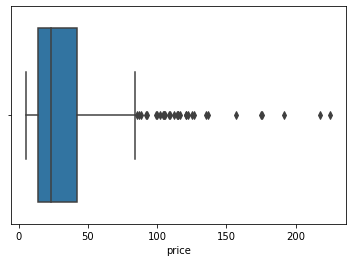

In [56]:
#detecter les valeurs aberrantes méthode visuelle
#boxplot
sns.boxplot(df_erp_web['price'])


In [57]:
#trouver les outliers
def find_all_outliers(v):
    Q1 = np.quantile(v, 0.25)
    Q3 = np.quantile(v, 0.75)
    EIQ = Q3-Q1
    LI = Q1 - (EIQ*1.5)
    LS = Q3 + (EIQ*1.5)
    i = list(v.index[(v < LI)] | ( v >LS))
    val = list(v[i])
    return i, val

In [58]:
OUTLIER= find_all_outliers(df_erp_web['price'])
OUTLIER[1]

C:\Users\akdim\AppData\Local\Temp\ipykernel_2836\2956162139.py:8: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  i = list(v.index[(v < LI)] | ( v >LS))


[100.0,
 88.4,
 225.0,
 126.5,
 85.6,
 176.0,
 108.5,
 157.0,
 104.0,
 109.6,
 102.3,
 137.0,
 217.5,
 105.0,
 105.0,
 112.0,
 86.8,
 92.0,
 124.8,
 175.0,
 191.3,
 93.0,
 122.0,
 114.0,
 135.0,
 105.6,
 116.4,
 115.0,
 121.0,
 99.0,
 115.0,
 121.0]

In [59]:
#methode analytique z_score
#on soustrait à chaque valeur la moyenne des prix qu'on divise par l'ecart type 
#(comme si on mesurait la distance par rapport à un centre)
#on crée une boucle qui va comparer la donnée au z_score s'il est inférieur à la moyenne
#si supérieur à 3 on l'ajoute a la liste des outliers
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
        
    for i in data:
        z_score=(i-mean) /std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers


In [60]:
#on applique cette fonction a notre dataframe
detect_outliers(df_erp_web['price'])

[225.0,
 126.5,
 176.0,
 157.0,
 137.0,
 217.5,
 124.8,
 175.0,
 191.3,
 122.0,
 135.0,
 116.4,
 121.0,
 121.0]

### CONCLUSION

In [59]:
#On constate ici l'importance du nettoyage des données afin de s'assurer de la cohérence
#Il y a un nombre important de valeurs manquantes au niveau des références des produits ce qui ne permet pas d'être suffisamment précis
#Il n'y a pas d’erreur de saisie au niveau des prix
#Il n'y a pas de valeurs aberrantes mais des valeurs atypiques
#Le rapprochement des fichier a permis de faciliter les calculs de CA mais ne permet pas à ce stade de calculer l’évolution des ventes
